# DATA MINING - PROJET DE CLUSTERING DE JOUEURS DE FOOTBALL SUR LA SAISON 2024/2025

## 0. IMPORTS ET CONFIGS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, shapiro, skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Configuration des visualisations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

print("Bibliothèques importées avec succès")
print("="*80)

Bibliothèques importées avec succès


## 1. CHARGEMENT ET INSPECTION INITIALE DES DONNÉES

In [2]:
# Chargement du dataset
df = pd.read_csv('../data/cleaned_scouting_report.csv')

print("APERÇU GÉNÉRAL DU DATASET")
print("-"*80)
print(f"Nombre d'observations (joueurs) : {len(df)}")
print(f"Nombre de variables : {len(df.columns)}")
print(f"Dimensions du dataset : {df.shape}")
print("\n")

# Affichage des premières lignes
print("Premières lignes du dataset :")
print(df.head(10))

APERÇU GÉNÉRAL DU DATASET
--------------------------------------------------------------------------------
Nombre d'observations (joueurs) : 1828
Nombre de variables : 23
Dimensions du dataset : (1828, 23)


Premières lignes du dataset :
          player_name Position Team Name  Buts (sans les pénaltys)  \
0       Denis Zakaria       DM    Monaco                      0.22   
1  Eliesse Ben Seghir       LW    Monaco                      0.37   
2           Vanderson       RB    Monaco                      0.16   
3        Thilo Kehrer       CB    Monaco                      0.13   
4     Takumi Minamino       LW    Monaco                      0.29   
5       Lamine Camara       CM    Monaco                      0.12   
6     Folarin Balogun       CF    Monaco                      0.37   
7   Maghnes Akliouche       RW    Monaco                      0.22   
8     Mohammed Salisu       CB    Monaco                      0.06   
9      Wilfried Singo       CB    Monaco                      

In [3]:
# Affichage de la structure complète
print("\nStructure complète du dataset :")
print(df.info())


Structure complète du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_name                  1828 non-null   object 
 1   Position                     1828 non-null   object 
 2   Team Name                    1828 non-null   object 
 3   Buts (sans les pénaltys)     1828 non-null   float64
 4   npxG: xG sans les pénaltys   1828 non-null   float64
 5   Total des tirs               1828 non-null   float64
 6   Passes décisives             1828 non-null   float64
 7   xAG: Prévu(s) Buts assistés  1828 non-null   float64
 8   npxG + xAG                   1828 non-null   float64
 9   Actions menant à un tir      1828 non-null   float64
 10  Passes tentées               1828 non-null   float64
 11  % de passes réussies         1828 non-null   object 
 12  Passes progressives          1828 non-null 

In [4]:
# Statistiques descriptives
print("\nStatistiques descriptives des variables numériques :")
print(df.describe().T)


Statistiques descriptives des variables numériques :
                              count       mean        std   min      25%  \
Buts (sans les pénaltys)     1828.0   0.139677   0.162775  0.00   0.0000   
npxG: xG sans les pénaltys   1828.0   0.137270   0.135098  0.00   0.0400   
Total des tirs               1828.0   1.368627   0.967048  0.00   0.5600   
Passes décisives             1828.0   0.104830   0.111961  0.00   0.0000   
xAG: Prévu(s) Buts assistés  1828.0   0.104902   0.085402  0.00   0.0400   
npxG + xAG                   1828.0   0.242303   0.187647  0.00   0.0900   
Actions menant à un tir      1828.0   2.356658   1.268780  0.00   1.4300   
Passes tentées               1828.0  45.598189  16.874800  9.40  33.3525   
Passes progressives          1828.0   3.807960   1.739137  0.32   2.5500   
Possessions progressives     1828.0   1.860509   1.362059  0.00   0.8400   
Dribbles réussis             1828.0   0.861368   0.740181  0.00   0.3300   
Touches (SurfRépOff)         1828.

In [5]:
# Identification et classification des colonnes
print("\nListe complète des colonnes :")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# Identification des colonnes par type
colonnes_info = ['player_name', 'Position', 'Team Name', 'Age']
colonnes_stats = [col for col in df.columns if col not in colonnes_info]

print(f"\n{'='*80}")
print(f"Classification des colonnes :")
print(f"{'='*80}")
print(f"Colonnes d'identification : {len(colonnes_info)}")
print(colonnes_info)
print(f"\nColonnes statistiques : {len(colonnes_stats)}")
for i, col in enumerate(colonnes_stats, 1):
    print(f"  {i}. {col}")


Liste complète des colonnes :
1. player_name
2. Position
3. Team Name
4. Buts (sans les pénaltys)
5. npxG: xG sans les pénaltys
6. Total des tirs
7. Passes décisives
8. xAG: Prévu(s) Buts assistés
9. npxG + xAG
10. Actions menant à un tir
11. Passes tentées
12. % de passes réussies
13. Passes progressives
14. Possessions progressives
15. Dribbles réussis
16. Touches (SurfRépOff)
17. Passes progressives reçues
18. Tacles
19. Interceptions
20. Balles contrées
21. Dégagements
22. Duel aérien gagnés
23. Age

Classification des colonnes :
Colonnes d'identification : 4
['player_name', 'Position', 'Team Name', 'Age']

Colonnes statistiques : 19
  1. Buts (sans les pénaltys)
  2. npxG: xG sans les pénaltys
  3. Total des tirs
  4. Passes décisives
  5. xAG: Prévu(s) Buts assistés
  6. npxG + xAG
  7. Actions menant à un tir
  8. Passes tentées
  9. % de passes réussies
  10. Passes progressives
  11. Possessions progressives
  12. Dribbles réussis
  13. Touches (SurfRépOff)
  14. Passes progr

## 2. ANALYSE DE LA QUALITÉ DES DONNÉES

In [6]:
print("ANALYSE DE LA QUALITÉ DES DONNÉES")
print("="*80)

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonnes': missing_values.index,
    'Valeurs_Manquantes': missing_values.values,
    'Pourcentage': missing_percent.values
})
missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values('Valeurs_Manquantes', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("Aucune valeur manquante détectée dans le dataset.")

# Vérification des types de données
print("\n" + "-"*80)
print("Problèmes de types détectés :")
print("-"*80)

# Age et % de passes réussies sont en 'object' alors qu'ils devraient être numériques
print(f"Type de 'Age' : {df['Age'].dtype} (devrait être numérique)")
print(f"Type de '% de passes réussies' : {df['% de passes réussies'].dtype} (devrait être numérique)")

print("\nExemple de valeurs pour 'Age' :")
print(df['Age'].head(10))

print("\nExemple de valeurs pour '% de passes réussies' :")
print(df['% de passes réussies'].head(10))

ANALYSE DE LA QUALITÉ DES DONNÉES

Valeurs manquantes par colonne :
Aucune valeur manquante détectée dans le dataset.

--------------------------------------------------------------------------------
Problèmes de types détectés :
--------------------------------------------------------------------------------
Type de 'Age' : object (devrait être numérique)
Type de '% de passes réussies' : object (devrait être numérique)

Exemple de valeurs pour 'Age' :
0    27
1    19
2    23
3    28
4    29
5    20
6    23
7    22
8    25
9    23
Name: Age, dtype: object

Exemple de valeurs pour '% de passes réussies' :
0    90.8%
1    78.4%
2    74.2%
3    89.2%
4    70.3%
5    75.7%
6    71.4%
7    77.6%
8    84.5%
9    85.1%
Name: % de passes réussies, dtype: object


In [7]:
# Conversion des types de données
print("\n" + "="*80)
print("CORRECTION DES TYPES DE DONNÉES")
print("="*80)

# Conversion de Age en numérique
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
print(f"\nType de 'Age' après conversion : {df['Age'].dtype}")
print(f"Valeurs manquantes après conversion : {df['Age'].isnull().sum()}")

# Conversion de % de passes réussies en numérique
# Il faut d'abord retirer le symbole % si présent
if df['% de passes réussies'].dtype == 'object':
    df['% de passes réussies'] = df['% de passes réussies'].astype(str).str.replace('%', '').str.strip()
    df['% de passes réussies'] = pd.to_numeric(df['% de passes réussies'], errors='coerce')
    
print(f"\nType de '% de passes réussies' après conversion : {df['% de passes réussies'].dtype}")
print(f"Valeurs manquantes après conversion : {df['% de passes réussies'].isnull().sum()}")

# Vérification des valeurs après conversion
print("\nStatistiques après conversion :")
print(f"Age - Min: {df['Age'].min()}, Max: {df['Age'].max()}, Moyenne: {df['Age'].mean():.2f}")
print(f"% passes réussies - Min: {df['% de passes réussies'].min():.1f}%, Max: {df['% de passes réussies'].max():.1f}%, Moyenne: {df['% de passes réussies'].mean():.1f}%")

# Mise à jour de la liste des colonnes statistiques
colonnes_stats = [col for col in df.columns if col not in ['player_name', 'Position', 'Team Name', 'Age']]
print(f"\nNombre de colonnes statistiques : {len(colonnes_stats)}")


CORRECTION DES TYPES DE DONNÉES

Type de 'Age' après conversion : float64
Valeurs manquantes après conversion : 1

Type de '% de passes réussies' après conversion : float64
Valeurs manquantes après conversion : 0

Statistiques après conversion :
Age - Min: 17.0, Max: 48.0, Moyenne: 26.28
% passes réussies - Min: 51.3%, Max: 95.2%, Moyenne: 78.7%

Nombre de colonnes statistiques : 19


In [8]:
# Détection des doublons
print("\n" + "="*80)
print("DÉTECTION DES DOUBLONS")
print("="*80)

duplicates = df.duplicated(subset=['player_name', 'Team Name']).sum()
print(f"Nombre de doublons (même joueur, même équipe) : {duplicates}")

if duplicates > 0:
    print("\nJoueurs en doublon :")
    duplicate_players = df[df.duplicated(subset=['player_name', 'Team Name'], keep=False)].sort_values(['player_name', 'Team Name'])
    print(duplicate_players[['player_name', 'Team Name', 'Position', 'Age']])


DÉTECTION DES DOUBLONS
Nombre de doublons (même joueur, même équipe) : 2

Joueurs en doublon :
        player_name Team Name Position   Age
193  Walid Cheddira  Espanyol       CF  26.0
194  Walid Cheddira  Espanyol       CF  26.0
191  Walid Cheddira    Napoli       CF  26.0
192  Walid Cheddira    Napoli       CF  26.0


In [9]:
# Vérification de la cohérence des données
print("\n" + "="*80)
print("VÉRIFICATION DE LA COHÉRENCE DES DONNÉES")
print("="*80)

# Les pourcentages doivent être entre 0 et 100
pct_passes = df['% de passes réussies']
print(f"\nPourcentage de passes réussies :")
print(f"  Min: {pct_passes.min():.1f}%")
print(f"  Max: {pct_passes.max():.1f}%")
print(f"  Moyenne: {pct_passes.mean():.1f}%")

if (pct_passes < 0).any() or (pct_passes > 100).any():
    print("  ATTENTION : Valeurs aberrantes détectées")
    print(f"  Valeurs < 0 : {(pct_passes < 0).sum()}")
    print(f"  Valeurs > 100 : {(pct_passes > 100).sum()}")
else:
    print("  Cohérence vérifiée : toutes les valeurs sont entre 0 et 100%")

# Vérification des valeurs négatives dans les colonnes statistiques
print("\n" + "-"*80)
print("Vérification des valeurs négatives :")
negative_counts = {}
for col in colonnes_stats:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        negative_counts[col] = neg_count

if negative_counts:
    print("ATTENTION : Valeurs négatives détectées dans :")
    for col, count in negative_counts.items():
        print(f"  - {col} : {count} valeurs négatives")
else:
    print("Aucune valeur négative détectée (cohérence respectée)")

# Vérification de la cohérence logique : npxG + xAG devrait être proche de la somme
print("\n" + "-"*80)
print("Vérification de la cohérence : npxG + xAG :")
calculated_sum = df['npxG: xG sans les pénaltys'] + df['xAG: Prévu(s) Buts assistés']
difference = np.abs(df['npxG + xAG'] - calculated_sum)
max_diff = difference.max()
mean_diff = difference.mean()

print(f"  Différence maximale : {max_diff:.6f}")
print(f"  Différence moyenne : {mean_diff:.6f}")
if max_diff < 0.01:
    print("  Cohérence vérifiée : la colonne 'npxG + xAG' correspond à la somme")
else:
    print("  ATTENTION : Incohérences détectées")


VÉRIFICATION DE LA COHÉRENCE DES DONNÉES

Pourcentage de passes réussies :
  Min: 51.3%
  Max: 95.2%
  Moyenne: 78.7%
  Cohérence vérifiée : toutes les valeurs sont entre 0 et 100%

--------------------------------------------------------------------------------
Vérification des valeurs négatives :
Aucune valeur négative détectée (cohérence respectée)

--------------------------------------------------------------------------------
Vérification de la cohérence : npxG + xAG :
  Différence maximale : 0.020000
  Différence moyenne : 0.003337
  ATTENTION : Incohérences détectées


## 3. NETTOYAGE DES DONNÉES

In [10]:
print("NETTOYAGE DES DONNÉES")
print("="*80)

# Traitement des doublons
print("\n1. TRAITEMENT DES DOUBLONS")
print("-"*80)

# Affichage détaillé des doublons pour décision
duplicates_detail = df[df.duplicated(subset=['player_name', 'Team Name'], keep=False)].sort_values(['player_name', 'Team Name'])
print("Détails des joueurs en doublon :")
print(duplicates_detail[['player_name', 'Team Name', 'Position', 'Age', 'Total des tirs', 'Passes tentées']])

# Suppression des doublons (on garde la première occurrence)
df_clean = df.drop_duplicates(subset=['player_name', 'Team Name'], keep='first')
print(f"\nNombre de lignes avant suppression : {len(df)}")
print(f"Nombre de lignes après suppression : {len(df_clean)}")
print(f"Lignes supprimées : {len(df) - len(df_clean)}")

# Traitement des valeurs manquantes dans Age
print("\n2. TRAITEMENT DES VALEURS MANQUANTES (AGE)")
print("-"*80)

missing_age = df_clean['Age'].isnull().sum()
print(f"Nombre de valeurs manquantes pour Age : {missing_age}")

if missing_age > 0:
    print("\nJoueurs avec âge manquant :")
    print(df_clean[df_clean['Age'].isnull()][['player_name', 'Position', 'Team Name']])
    
    # Stratégie : imputation par la médiane du poste
    print("\nStratégie : Imputation par la médiane de l'âge par poste")
    df_clean['Age'] = df_clean.groupby('Position')['Age'].transform(
        lambda x: x.fillna(x.median())
    )
    
    remaining_missing = df_clean['Age'].isnull().sum()
    print(f"Valeurs manquantes restantes : {remaining_missing}")
    
    if remaining_missing > 0:
        # Si certains postes n'ont qu'un joueur, imputation par la médiane globale
        df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
        print(f"Imputation finale par médiane globale : {df_clean['Age'].median():.1f} ans")

# Vérification finale
print("\n3. VÉRIFICATION FINALE")
print("-"*80)
print(f"Dimensions finales du dataset : {df_clean.shape}")
print(f"Valeurs manquantes totales : {df_clean.isnull().sum().sum()}")

# Sauvegarde du dataset nettoyé
df = df_clean.copy()
print("\nDataset nettoyé et prêt pour l'analyse")

NETTOYAGE DES DONNÉES

1. TRAITEMENT DES DOUBLONS
--------------------------------------------------------------------------------
Détails des joueurs en doublon :
        player_name Team Name Position   Age  Total des tirs  Passes tentées
193  Walid Cheddira  Espanyol       CF  26.0            2.62           15.95
194  Walid Cheddira  Espanyol       CF  26.0            2.62           15.95
191  Walid Cheddira    Napoli       CF  26.0            2.62           15.95
192  Walid Cheddira    Napoli       CF  26.0            2.62           15.95

Nombre de lignes avant suppression : 1828
Nombre de lignes après suppression : 1826
Lignes supprimées : 2

2. TRAITEMENT DES VALEURS MANQUANTES (AGE)
--------------------------------------------------------------------------------
Nombre de valeurs manquantes pour Age : 1

Joueurs avec âge manquant :
     player_name Position   Team Name
1660  Luis Pérez       RB  Valladolid

Stratégie : Imputation par la médiane de l'âge par poste


Valeurs manquantes restantes : 0

3. VÉRIFICATION FINALE
--------------------------------------------------------------------------------
Dimensions finales du dataset : (1826, 23)
Valeurs manquantes totales : 0

Dataset nettoyé et prêt pour l'analyse


## 4. ANALYSE DE LA DISTRIBUTION DES POSTES

In [17]:
print("ANALYSE DE LA DISTRIBUTION DES POSTES")
print("="*80)

# Distribution des postes
position_counts = df['Position'].value_counts()
print(f"\nNombre de postes différents : {len(position_counts)}")
print("\nRépartition des joueurs par poste :")
position_distribution = position_counts.to_frame().rename(columns={'count': 'Nombre'})
position_distribution['Pourcentage'] = (position_distribution['Nombre'] / len(df) * 100).round(2)
print(position_distribution)

ANALYSE DE LA DISTRIBUTION DES POSTES

Nombre de postes différents : 13

Répartition des joueurs par poste :
          Nombre  Pourcentage
Position                     
CB           381        20.87
CM           270        14.79
CF           229        12.54
RB           174         9.53
DM           168         9.20
RW           147         8.05
LW           142         7.78
LB           142         7.78
AM           122         6.68
SS            17         0.93
RM            17         0.93
LM            13         0.71
MO             4         0.22


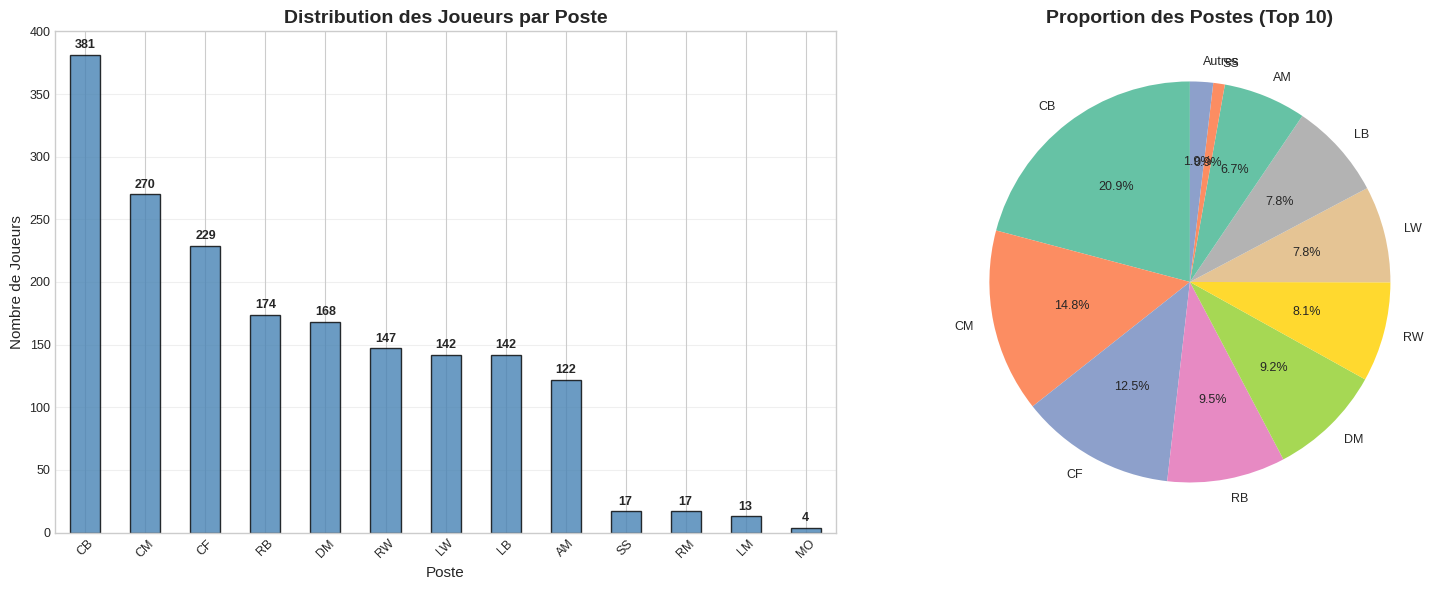


Visualisation sauvegardée : viz/01_distribution_postes.png


In [19]:
# Visualisation de la distribution des postes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique en barres
position_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Distribution des Joueurs par Poste', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Poste', fontsize=11)
axes[0].set_ylabel('Nombre de Joueurs', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(position_counts.values):
    axes[0].text(i, v + 3, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Graphique circulaire (top 10 postes + "Autres")
top_n = 10
top_positions = position_counts.head(top_n)
if len(position_counts) > top_n:
    others = position_counts.iloc[top_n:].sum()
    plot_data = pd.concat([top_positions, pd.Series({'Autres': others})])
else:
    plot_data = position_counts

axes[1].pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', 
            startangle=90, textprops={'fontsize': 9})
axes[1].set_title('Proportion des Postes (Top 10)', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('../viz/01_distribution_postes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualisation sauvegardée : viz/01_distribution_postes.png")

### 4.1 ANALYSE SPÉCIFIQUE DES POSTES RM/LM

In [ ]:
# on doit déterminer si RM/LM ressemblent plus à des latéraux pistons dans un systeme 343 ou des ailiers dans pour une catégorisation optimale

print("\n" + "="*80)
print("ANALYSE DES PROFILS RM/LM")
print("="*80)

# Identification des joueurs RM/LM
rm_lm_players = df[df['Position'].isin(['RM', 'LM'])]
print(f"\nNombre de joueurs RM/LM : {len(rm_lm_players)}")
print("\nJoueurs concernés :")
print(rm_lm_players[['player_name', 'Position', 'Team Name', 'Age']].to_string())

# Métriques clés pour différencier latéraux vs ailiers
metriques_cles = [
    'Buts (sans les pénaltys)',
    'npxG: xG sans les pénaltys',
    'Total des tirs',
    'Passes décisives',
    'xAG: Prévu(s) Buts assistés',
    'Dribbles réussis',
    'Possessions progressives',
    'Tacles',
    'Interceptions',
    'Duel aérien gagnés'
]

print("\n" + "-"*80)
print("COMPARAISON DES PROFILS STATISTIQUES")
print("-"*80)

# Statistiques moyennes par catégorie
categories_comparaison = ['LB', 'RB', 'LW', 'RW', 'LM', 'RM']
stats_comparaison = df[df['Position'].isin(categories_comparaison)].groupby('Position')[metriques_cles].mean()

print("\nStatistiques moyennes par poste :")
print(stats_comparaison.round(3).to_string())


ANALYSE DES PROFILS RM/LM

Nombre de joueurs RM/LM : 30

Joueurs concernés :
                player_name Position        Team Name   Age
151      Junior Dina Ebimbe       RM   Eint Frankfurt  23.0
269            Timothy Weah       RM         Juventus  24.0
293         Marcos Llorente       RM  Atlético Madrid  29.0
298             Samuel Lino       LM  Atlético Madrid  24.0
431        Jeremie Frimpong       RM       Leverkusen  23.0
438            Nathan Tella       RM       Leverkusen  25.0
480             Robert Skov       LM     Union Berlin  28.0
563   Przemysław Frankowski       RM             Lens  29.0
595          Manuel Lazzari       RM            Lazio  30.0
695        Valentino Lazaro       LM           Torino  28.0
702              Borna Sosa       LM           Torino  26.0
705         Marcus Pedersen       RM           Torino  24.0
707         Raoul Bellanova       RM         Atalanta  24.0
739         Nicola Zalewski       LM             Roma  22.0
891          Matteo Ru

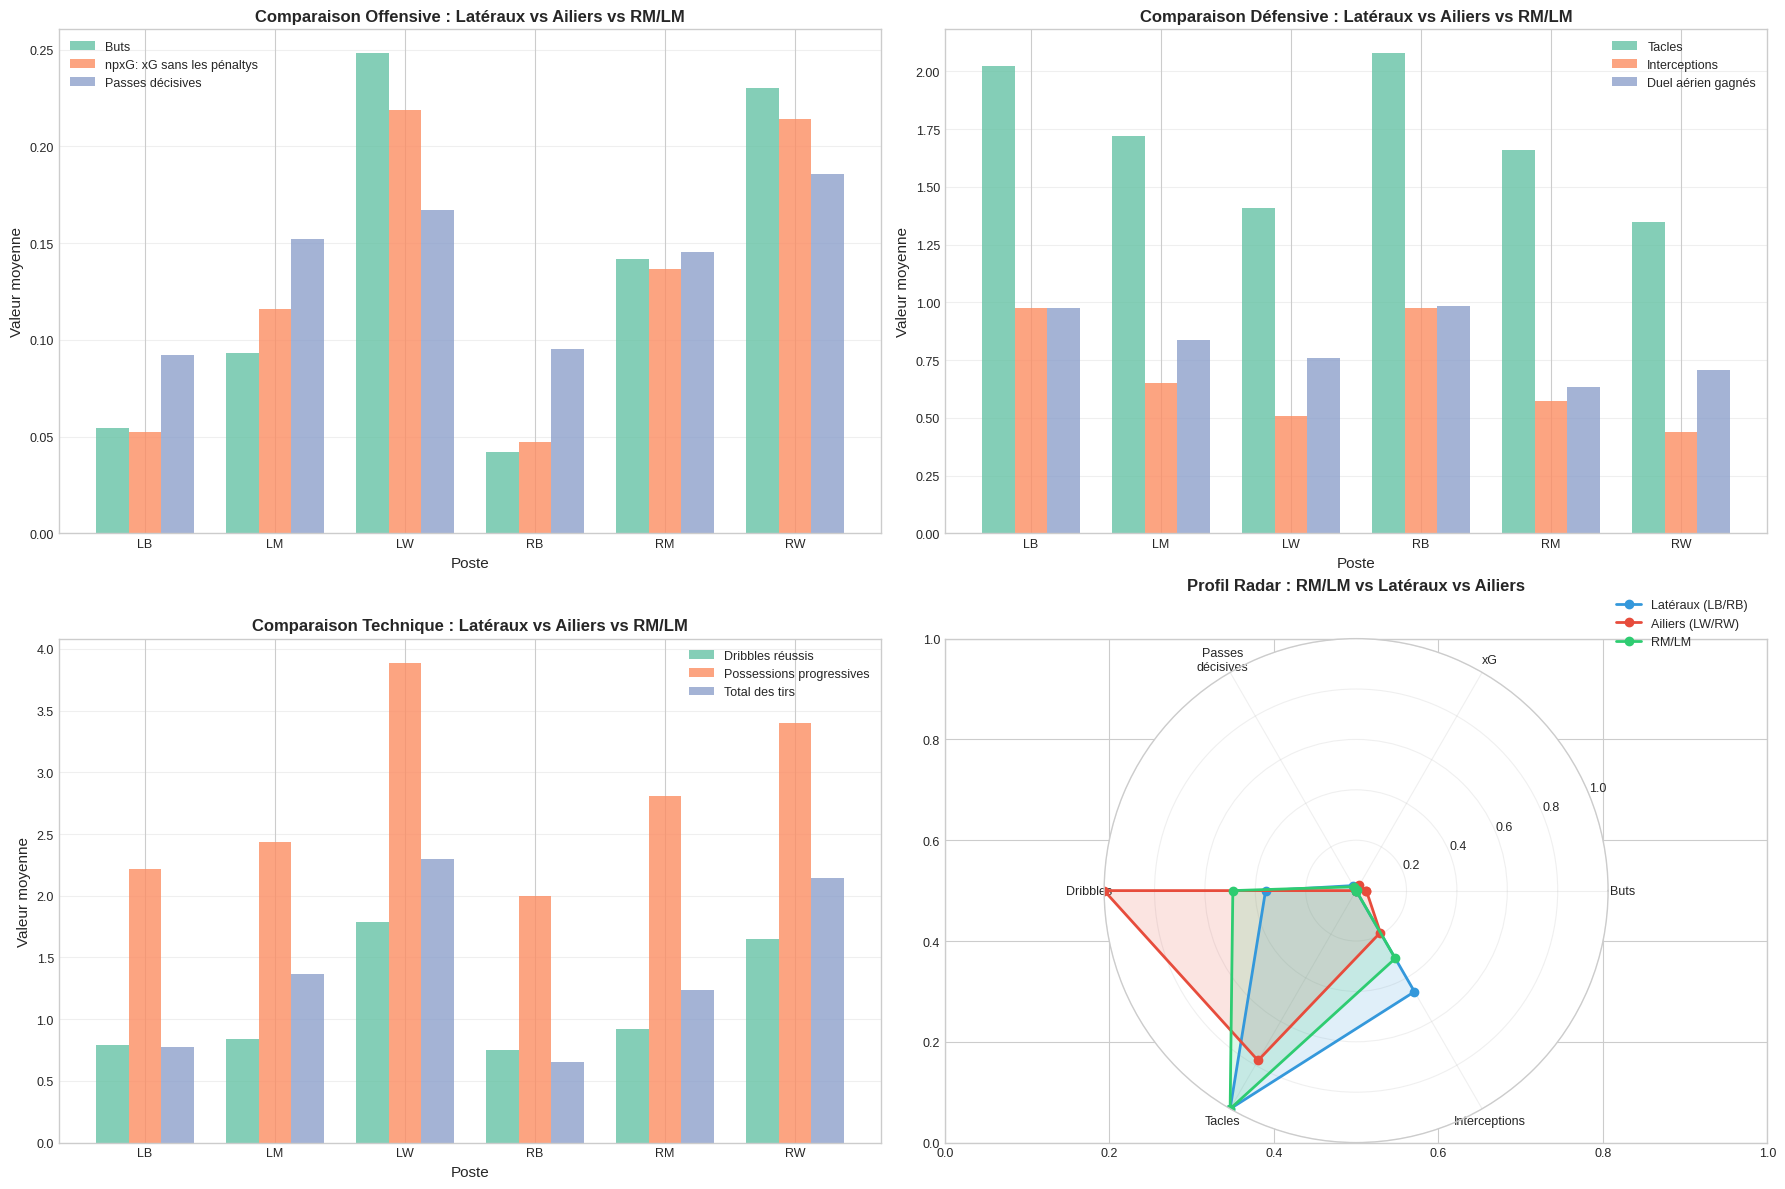


Visualisation sauvegardée : viz/03_analyse_rm_lm.png


In [22]:
# Visualisation comparative RM/LM vs Latéraux vs Ailiers
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Comparaison offensive (Buts + xG + Passes décisives)
metriques_offensives = ['Buts (sans les pénaltys)', 'npxG: xG sans les pénaltys', 'Passes décisives']
stats_off = df[df['Position'].isin(categories_comparaison)].groupby('Position')[metriques_offensives].mean()

x = np.arange(len(stats_off.index))
width = 0.25

for i, metric in enumerate(metriques_offensives):
    axes[0, 0].bar(x + i*width, stats_off[metric], width, 
                   label=metric.split('(')[0].strip() if '(' in metric else metric, 
                   alpha=0.8)

axes[0, 0].set_xlabel('Poste', fontsize=11)
axes[0, 0].set_ylabel('Valeur moyenne', fontsize=11)
axes[0, 0].set_title('Comparaison Offensive : Latéraux vs Ailiers vs RM/LM', 
                      fontweight='bold', fontsize=12)
axes[0, 0].set_xticks(x + width)
axes[0, 0].set_xticklabels(stats_off.index)
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Comparaison défensive (Tacles + Interceptions)
metriques_defensives = ['Tacles', 'Interceptions', 'Duel aérien gagnés']
stats_def = df[df['Position'].isin(categories_comparaison)].groupby('Position')[metriques_defensives].mean()

x = np.arange(len(stats_def.index))
width = 0.25

for i, metric in enumerate(metriques_defensives):
    axes[0, 1].bar(x + i*width, stats_def[metric], width, label=metric, alpha=0.8)

axes[0, 1].set_xlabel('Poste', fontsize=11)
axes[0, 1].set_ylabel('Valeur moyenne', fontsize=11)
axes[0, 1].set_title('Comparaison Défensive : Latéraux vs Ailiers vs RM/LM', 
                      fontweight='bold', fontsize=12)
axes[0, 1].set_xticks(x + width)
axes[0, 1].set_xticklabels(stats_def.index)
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Comparaison technique (Dribbles + Possessions progressives)
metriques_techniques = ['Dribbles réussis', 'Possessions progressives', 'Total des tirs']
stats_tech = df[df['Position'].isin(categories_comparaison)].groupby('Position')[metriques_techniques].mean()

x = np.arange(len(stats_tech.index))
width = 0.25

for i, metric in enumerate(metriques_techniques):
    axes[1, 0].bar(x + i*width, stats_tech[metric], width, label=metric, alpha=0.8)

axes[1, 0].set_xlabel('Poste', fontsize=11)
axes[1, 0].set_ylabel('Valeur moyenne', fontsize=11)
axes[1, 0].set_title('Comparaison Technique : Latéraux vs Ailiers vs RM/LM', 
                      fontweight='bold', fontsize=12)
axes[1, 0].set_xticks(x + width)
axes[1, 0].set_xticklabels(stats_tech.index)
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Radar chart pour RM/LM vs moyenne Latéraux vs moyenne Ailiers
from sklearn.preprocessing import MinMaxScaler

categories_radar = ['Buts', 'xG', 'Passes\ndécisives', 'Dribbles', 'Tacles', 'Interceptions']
metriques_radar = ['Buts (sans les pénaltys)', 'npxG: xG sans les pénaltys', 'Passes décisives', 
                   'Dribbles réussis', 'Tacles', 'Interceptions']

# Calcul des moyennes
lateraux_mean = df[df['Position'].isin(['LB', 'RB'])][metriques_radar].mean().values
ailiers_mean = df[df['Position'].isin(['LW', 'RW'])][metriques_radar].mean().values
rm_lm_mean = df[df['Position'].isin(['RM', 'LM'])][metriques_radar].mean().values

# Normalisation pour le radar (0-1)
scaler = MinMaxScaler()
all_data = np.vstack([lateraux_mean, ailiers_mean, rm_lm_mean])
normalized = scaler.fit_transform(all_data.T).T

# Création du radar
angles = np.linspace(0, 2 * np.pi, len(categories_radar), endpoint=False).tolist()
angles += angles[:1]

ax = plt.subplot(2, 2, 4, projection='polar')

# Plot pour chaque groupe
for idx, (label, values, color) in enumerate([
    ('Latéraux (LB/RB)', np.append(normalized[0], normalized[0][0]), '#3498db'),
    ('Ailiers (LW/RW)', np.append(normalized[1], normalized[1][0]), '#e74c3c'),
    ('RM/LM', np.append(normalized[2], normalized[2][0]), '#2ecc71')
]):
    ax.plot(angles, values, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, values, alpha=0.15, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories_radar, fontsize=9)
ax.set_ylim(0, 1)
ax.set_title('Profil Radar : RM/LM vs Latéraux vs Ailiers', 
             fontweight='bold', fontsize=12, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../viz/03_analyse_rm_lm.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualisation sauvegardée : viz/03_analyse_rm_lm.png")

In [23]:
# Calcul de distances pour déterminer la proximité
from scipy.spatial.distance import euclidean

print("\n" + "-"*80)
print("ANALYSE DE SIMILARITÉ : RM/LM vs LATÉRAUX vs AILIERS")
print("-"*80)

# Calcul des distances euclidiennes
lateraux_mean_full = df[df['Position'].isin(['LB', 'RB'])][metriques_cles].mean().values
ailiers_mean_full = df[df['Position'].isin(['LW', 'RW'])][metriques_cles].mean().values
rm_lm_mean_full = df[df['Position'].isin(['RM', 'LM'])][metriques_cles].mean().values

# Normalisation avant calcul de distance
scaler_full = MinMaxScaler()
all_data_full = np.vstack([lateraux_mean_full, ailiers_mean_full, rm_lm_mean_full])
normalized_full = scaler_full.fit_transform(all_data_full.T).T

lateraux_norm = normalized_full[0]
ailiers_norm = normalized_full[1]
rm_lm_norm = normalized_full[2]

distance_lateraux = euclidean(rm_lm_norm, lateraux_norm)
distance_ailiers = euclidean(rm_lm_norm, ailiers_norm)

print(f"\nDistance euclidienne RM/LM vs Latéraux : {distance_lateraux:.4f}")
print(f"Distance euclidienne RM/LM vs Ailiers : {distance_ailiers:.4f}")

if distance_lateraux < distance_ailiers:
    print(f"\n→ RM/LM sont statistiquement plus proches des LATÉRAUX")
    print(f"  (différence de distance : {distance_ailiers - distance_lateraux:.4f})")
    recommendation = "Latéraux"
else:
    print(f"\n→ RM/LM sont statistiquement plus proches des AILIERS")
    print(f"  (différence de distance : {distance_lateraux - distance_ailiers:.4f})")
    recommendation = "Ailiers"

# Analyse détaillée métrique par métrique
print("\n" + "-"*80)
print("COMPARAISON MÉTRIQUE PAR MÉTRIQUE")
print("-"*80)

comparison_df = pd.DataFrame({
    'Métrique': metriques_cles,
    'Latéraux (LB/RB)': lateraux_mean_full,
    'Ailiers (LW/RW)': ailiers_mean_full,
    'RM/LM': rm_lm_mean_full
})

comparison_df['Diff vs Latéraux'] = np.abs(comparison_df['RM/LM'] - comparison_df['Latéraux (LB/RB)'])
comparison_df['Diff vs Ailiers'] = np.abs(comparison_df['RM/LM'] - comparison_df['Ailiers (LW/RW)'])
comparison_df['Plus proche de'] = comparison_df.apply(
    lambda x: 'Latéraux' if x['Diff vs Latéraux'] < x['Diff vs Ailiers'] else 'Ailiers', axis=1
)

print(comparison_df.round(3).to_string())

# Comptage
proximity_count = comparison_df['Plus proche de'].value_counts()
print(f"\n" + "="*80)
print("RÉSUMÉ DE L'ANALYSE RM/LM")
print("="*80)
lateraux_count = proximity_count.get('Latéraux', 0)
ailiers_count = proximity_count.get('Ailiers', 0)
print(f"Métriques où RM/LM ressemblent plus aux latéraux : {lateraux_count}/{len(metriques_cles)}")
print(f"Métriques où RM/LM ressemblent plus aux ailiers : {ailiers_count}/{len(metriques_cles)}")

print(f"\n→ RECOMMANDATION POUR LE CLUSTERING : Catégoriser RM/LM avec les {recommendation}")


--------------------------------------------------------------------------------
ANALYSE DE SIMILARITÉ : RM/LM vs LATÉRAUX vs AILIERS
--------------------------------------------------------------------------------

Distance euclidienne RM/LM vs Latéraux : 0.5181
Distance euclidienne RM/LM vs Ailiers : 0.3579

→ RM/LM sont statistiquement plus proches des AILIERS
  (différence de distance : 0.1602)

--------------------------------------------------------------------------------
COMPARAISON MÉTRIQUE PAR MÉTRIQUE
--------------------------------------------------------------------------------
                      Métrique  Latéraux (LB/RB)  Ailiers (LW/RW)  RM/LM  Diff vs Latéraux  Diff vs Ailiers Plus proche de
0     Buts (sans les pénaltys)             0.048            0.239  0.121             0.073            0.118       Latéraux
1   npxG: xG sans les pénaltys             0.050            0.216  0.128             0.078            0.089       Latéraux
2               Total des tirs 

### 4.2 CATÉGORISATION OPTIMALE POUR LE CLUSTERING

In [24]:
print("\n" + "="*80)
print("CATÉGORISATION OPTIMALE POUR LE CLUSTERING")
print("="*80)

def categoriser_pour_clustering(position, rm_lm_category):
    """
    Catégorisation optimale tenant compte de la polyvalence réaliste
    
    Paramètres:
    - position: poste du joueur
    - rm_lm_category: catégorie déterminée pour RM/LM ('Latéraux' ou 'Ailiers')
    """
    mapping = {
        # Défense
        'CB': 'Défenseurs Centraux',
        'LB': 'Latéraux',
        'RB': 'Latéraux',
        'LWB': 'Latéraux',
        'RWB': 'Latéraux',
        
        # Milieux
        'DM': 'Milieux Défensifs',
        'CDM': 'Milieux Défensifs',
        'CM': 'Milieux Centraux',
        'LCM': 'Milieux Centraux',
        'RCM': 'Milieux Centraux',
        'AM': 'Milieux Offensifs',
        'CAM': 'Milieux Offensifs',
        'MO': 'Milieux Offensifs',
        
        # Attaque
        'LW': 'Ailiers',
        'RW': 'Ailiers',
        'LF': 'Ailiers',
        'RF': 'Ailiers',
        'CF': 'Attaquants',
        'ST': 'Attaquants',
        'FW': 'Attaquants',
        'SS': 'Attaquants'
    }
    
    # Traitement spécial pour RM/LM selon l'analyse
    if position in ['RM', 'LM']:
        return rm_lm_category
    
    return mapping.get(position, 'Autre')

# Application de la catégorisation (adapter selon les résultats de l'analyse RM/LM)
# NOTE: Remplacer 'Ailiers' par 'Latéraux' si l'analyse montre que RM/LM sont plus proches des latéraux
df['Categorie_Clustering'] = df['Position'].apply(
    lambda x: categoriser_pour_clustering(x, recommendation)
)

clustering_counts = df['Categorie_Clustering'].value_counts()
print(f"\nCatégorisation retenue pour RM/LM : {recommendation}")
print("\nRépartition des joueurs par catégorie de clustering :")
clustering_distribution = clustering_counts.to_frame().rename(columns={'count': 'Nombre'})
clustering_distribution['Pourcentage'] = (clustering_distribution['Nombre'] / len(df) * 100).round(2)
print(clustering_distribution)

# Détail des regroupements
print("\n" + "-"*80)
print("DÉTAIL DES REGROUPEMENTS PAR CATÉGORIE")
print("-"*80)

categorisation_detail = df.groupby('Categorie_Clustering').agg({
    'Position': lambda x: ', '.join(sorted(x.unique())),
    'player_name': 'count'
}).rename(columns={'player_name': 'Nombre', 'Position': 'Postes inclus'})

categorisation_detail = categorisation_detail.sort_values('Nombre', ascending=False)
print(categorisation_detail.to_string())


CATÉGORISATION OPTIMALE POUR LE CLUSTERING

Catégorisation retenue pour RM/LM : Ailiers

Répartition des joueurs par catégorie de clustering :
                      Nombre  Pourcentage
Categorie_Clustering                     
Défenseurs Centraux      381        20.87
Ailiers                  319        17.47
Latéraux                 316        17.31
Milieux Centraux         270        14.79
Attaquants               246        13.47
Milieux Défensifs        168         9.20
Milieux Offensifs        126         6.90

--------------------------------------------------------------------------------
DÉTAIL DES REGROUPEMENTS PAR CATÉGORIE
--------------------------------------------------------------------------------
                       Postes inclus  Nombre
Categorie_Clustering                        
Défenseurs Centraux               CB     381
Ailiers               LM, LW, RM, RW     319
Latéraux                      LB, RB     316
Milieux Centraux                  CM     270
Attaqu

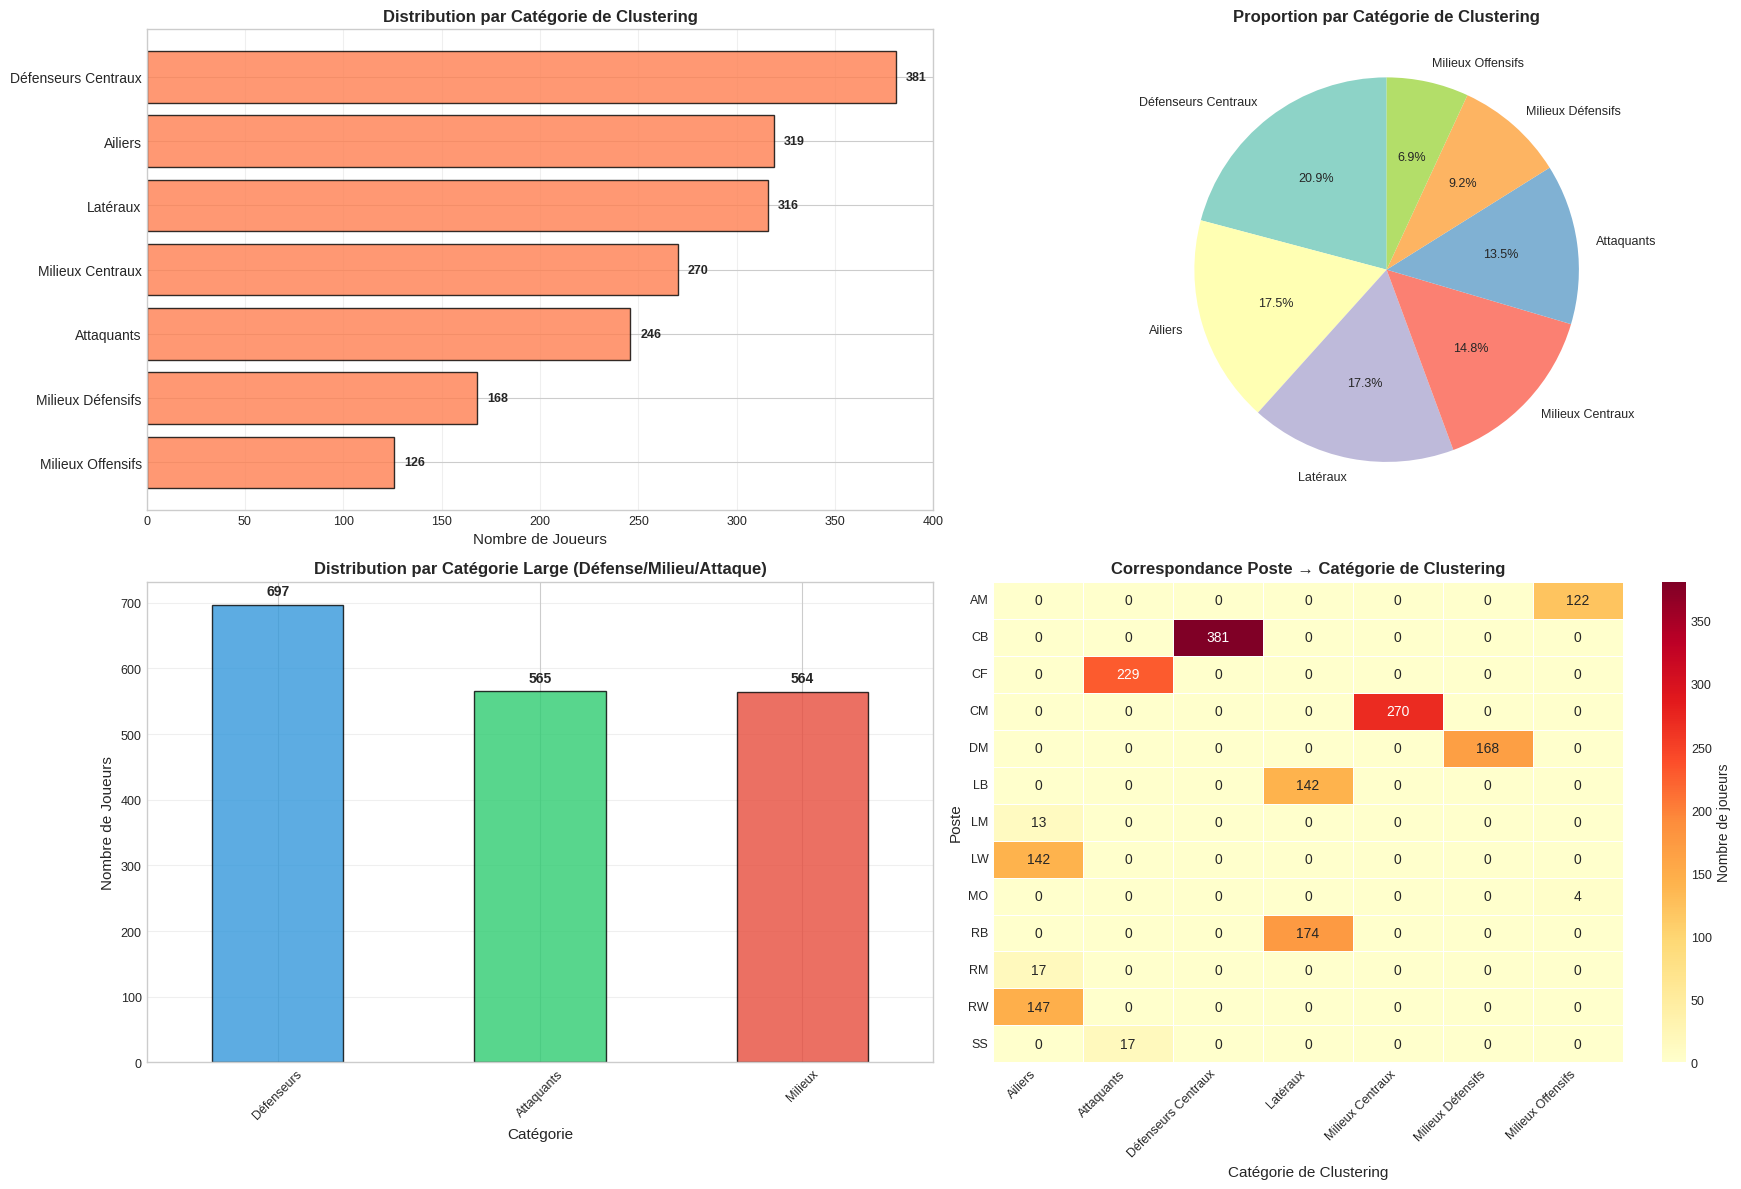


Visualisation sauvegardée : viz/04_categorisation_clustering.png


In [25]:
# Visualisation de la catégorisation finale
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Distribution par catégorie de clustering (barres horizontales)
clustering_counts_sorted = clustering_counts.sort_values(ascending=True)
axes[0, 0].barh(range(len(clustering_counts_sorted)), clustering_counts_sorted.values, 
                color='coral', edgecolor='black', alpha=0.8)
axes[0, 0].set_yticks(range(len(clustering_counts_sorted)))
axes[0, 0].set_yticklabels(clustering_counts_sorted.index, fontsize=10)
axes[0, 0].set_xlabel('Nombre de Joueurs', fontsize=11)
axes[0, 0].set_title('Distribution par Catégorie de Clustering', 
                      fontweight='bold', fontsize=12)
axes[0, 0].grid(axis='x', alpha=0.3)

# Ajout des valeurs
for i, v in enumerate(clustering_counts_sorted.values):
    axes[0, 0].text(v + 5, i, str(v), va='center', fontsize=9, fontweight='bold')

# 2. Graphique circulaire
colors = plt.cm.Set3(range(len(clustering_counts)))
axes[0, 1].pie(clustering_counts.values, labels=clustering_counts.index, autopct='%1.1f%%',
               startangle=90, colors=colors, textprops={'fontsize': 9})
axes[0, 1].set_title('Proportion par Catégorie de Clustering', 
                      fontweight='bold', fontsize=12)

# 3. Catégorisation large (Défense / Milieu / Attaque)
def categoriser_large(categorie):
    if categorie in ['Défenseurs Centraux', 'Latéraux']:
        return 'Défenseurs'
    elif categorie in ['Milieux Défensifs', 'Milieux Centraux', 'Milieux Offensifs']:
        return 'Milieux'
    elif categorie in ['Ailiers', 'Attaquants']:
        return 'Attaquants'
    else:
        return 'Autre'

df['Categorie_Large'] = df['Categorie_Clustering'].apply(categoriser_large)
categorie_large_counts = df['Categorie_Large'].value_counts()

categorie_large_counts.plot(kind='bar', ax=axes[1, 0], 
                             color=['#3498db', '#2ecc71', '#e74c3c'], 
                             edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Distribution par Catégorie Large (Défense/Milieu/Attaque)', 
                      fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Catégorie', fontsize=11)
axes[1, 0].set_ylabel('Nombre de Joueurs', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Ajout des valeurs
for i, v in enumerate(categorie_large_counts.values):
    axes[1, 0].text(i, v + 10, str(v), ha='center', va='bottom', 
                    fontsize=10, fontweight='bold')

# 4. Heatmap du nombre de joueurs par poste d'origine et catégorie clustering
crosstab = pd.crosstab(df['Position'], df['Categorie_Clustering'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1, 1], 
            cbar_kws={'label': 'Nombre de joueurs'}, linewidths=0.5)
axes[1, 1].set_title('Correspondance Poste → Catégorie de Clustering', 
                      fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Catégorie de Clustering', fontsize=11)
axes[1, 1].set_ylabel('Poste', fontsize=11)
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.setp(axes[1, 1].get_yticklabels(), rotation=0, fontsize=9)

plt.tight_layout()
plt.savefig('../viz/04_categorisation_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualisation sauvegardée : viz/04_categorisation_clustering.png")

In [26]:
# Résumé de la stratégie de catégorisation
print("\n" + "="*80)
print("RÉSUMÉ DE LA STRATÉGIE DE CATÉGORISATION")
print("="*80)

print("""
PRINCIPE DE CATÉGORISATION :
----------------------------
La catégorisation respecte les spécificités tactiques du football moderne :

1. DÉFENSEURS
   • Défenseurs Centraux (CB) : Gardés séparés (profil unique)
   • Latéraux (LB/RB) : Regroupés (polyvalence possible entre gauche/droite)
   
2. MILIEUX
   • Milieux Défensifs (DM) : Rôle de récupération
   • Milieux Centraux (CM) : Profil équilibré, box-to-box
   • Milieux Offensifs (AM/MO) : Créateurs, numéro 10
   
3. ATTAQUANTS
   • Ailiers (LW/RW) : Regroupés (polyvalence possible)
   • Attaquants (CF/SS) : Finisseurs purs
""")

print(f"4. CAS PARTICULIER : RM/LM")
print(f"   → Catégorisés avec : {recommendation}")
print(f"   → Justification : Analyse statistique multidimensionnelle")

print("""
OBJECTIF POUR LE CLUSTERING :
------------------------------
Cette catégorisation permettra de :
- Effectuer des clusterings séparés par catégorie pour plus de précision
- Respecter les réalités tactiques du football
- Identifier des profils similaires au sein de chaque catégorie
- Détecter les joueurs polyvalents (à cheval sur plusieurs clusters)
""")

print("\n" + "="*80)
print("CATÉGORISATION TERMINÉE")
print("="*80)


RÉSUMÉ DE LA STRATÉGIE DE CATÉGORISATION

PRINCIPE DE CATÉGORISATION :
----------------------------
La catégorisation respecte les spécificités tactiques du football moderne :

1. DÉFENSEURS
   • Défenseurs Centraux (CB) : Gardés séparés (profil unique)
   • Latéraux (LB/RB) : Regroupés (polyvalence possible entre gauche/droite)

2. MILIEUX
   • Milieux Défensifs (DM) : Rôle de récupération
   • Milieux Centraux (CM) : Profil équilibré, box-to-box
   • Milieux Offensifs (AM/MO) : Créateurs, numéro 10

3. ATTAQUANTS
   • Ailiers (LW/RW) : Regroupés (polyvalence possible)
   • Attaquants (CF/SS) : Finisseurs purs

4. CAS PARTICULIER : RM/LM
   → Catégorisés avec : Ailiers
   → Justification : Analyse statistique multidimensionnelle

OBJECTIF POUR LE CLUSTERING :
------------------------------
Cette catégorisation permettra de :
- Effectuer des clusterings séparés par catégorie pour plus de précision
- Respecter les réalités tactiques du football
- Identifier des profils similaires au se